In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import scipy.stats as sp
import scipy.special as spc
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
# Load the dataset
df_f = pd.read_excel('airfare.xlsx')
df_ad = pd.read_csv('air_distance.csv')

In [3]:
display(df_f.head(5))

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            9000 non-null   object
 1   Date               9000 non-null   object
 2   Departure Station  9000 non-null   object
 3   Arrival Station    9000 non-null   object
 4   Route Map          9000 non-null   object
 5   Departure Time     9000 non-null   object
 6   Arrival Time       9000 non-null   object
 7   Journey Time       9000 non-null   object
 8   Stops              9000 non-null   object
 9   Extra Info         9000 non-null   object
 10  Price              9000 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 773.6+ KB


In [5]:
df_f['Date'] = pd.to_datetime(df_f['Date'], format='%d/%m/%Y')


In [6]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            9000 non-null   object        
 1   Date               9000 non-null   datetime64[ns]
 2   Departure Station  9000 non-null   object        
 3   Arrival Station    9000 non-null   object        
 4   Route Map          9000 non-null   object        
 5   Departure Time     9000 non-null   object        
 6   Arrival Time       9000 non-null   object        
 7   Journey Time       9000 non-null   object        
 8   Stops              9000 non-null   object        
 9   Extra Info         9000 non-null   object        
 10  Price              9000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 773.6+ KB


In [7]:
df_f['Year'] = df_f['Date'].dt.year
df_f['Day'] = df_f['Date'].dt.day
df_f['Month_Name'] = df_f['Date'].dt.month_name()

In [8]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            9000 non-null   object        
 1   Date               9000 non-null   datetime64[ns]
 2   Departure Station  9000 non-null   object        
 3   Arrival Station    9000 non-null   object        
 4   Route Map          9000 non-null   object        
 5   Departure Time     9000 non-null   object        
 6   Arrival Time       9000 non-null   object        
 7   Journey Time       9000 non-null   object        
 8   Stops              9000 non-null   object        
 9   Extra Info         9000 non-null   object        
 10  Price              9000 non-null   int64         
 11  Year               9000 non-null   int64         
 12  Day                9000 non-null   int64         
 13  Month_Name         9000 non-null   object        
dtypes: datet

In [9]:
df_f.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Year,Day,Month_Name
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,March
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,May
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,June
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,May
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,March


In [10]:
df_f['Stops'].value_counts()

1 stop      4753
non-stop    2947
2 stops     1260
3 stops       40
Name: Stops, dtype: int64

In [11]:
def extract_stop_count(stop):
    if stop == 'non-stop':
        return 0
    else:
        return int(stop.split(' ')[0])

df_f['Stop_Count'] = df_f['Stops'].apply(extract_stop_count)

In [12]:
df_f.head(10)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Year,Day,Month_Name,Stop_Count
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,March,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,May,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,June,2
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,May,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,March,1
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,2019,24,June,0
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,2019,12,March,1
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,2019,1,March,1
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,2019,12,March,1
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,2019,27,May,1


In [13]:
df_f['Extra Info'] = df_f['Extra Info'].replace('No Info', 'No info')
                                            

In [14]:
df_f.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Year,Day,Month_Name,Stop_Count
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,March,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,May,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,June,2
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,May,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,March,1


In [15]:
df_f['Arrival Time'].value_counts()

19:00           349
21:00           303
19:15           288
16:10           125
12:35           107
               ... 
10:55 25 May      1
18:20 02 Apr      1
00:15 22 Apr      1
01:20 28 May      1
10:00 02 Apr      1
Name: Arrival Time, Length: 1236, dtype: int64

In [16]:
# Assuming df_f is your DataFrame
df_f['Arrival Time'] = df_f['Arrival Time'].astype(str)  # Ensure 'Arrival Time' column is string type

# Extract only the time part and create a new column
df_f['Arrival Time (Extracted)'] = df_f['Arrival Time'].str.split().str[0]

# Display the updated DataFrame
print(df_f[['Arrival Time', 'Arrival Time (Extracted)']])


      Arrival Time Arrival Time (Extracted)
0     01:10 22 Mar                    01:10
1            13:15                    13:15
2     04:25 10 Jun                    04:25
3            23:30                    23:30
4            21:35                    21:35
...            ...                      ...
8995         10:05                    10:05
8996         07:40                    07:40
8997         21:05                    21:05
8998         19:15                    19:15
8999         14:10                    14:10

[9000 rows x 2 columns]


In [17]:
df_f.Year.nunique()

1

In [18]:
df_f1=df_f.copy()

In [19]:
df_f1.head(5)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Year,Day,Month_Name,Stop_Count,Arrival Time (Extracted)
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,March,0,01:10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,May,2,13:15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,June,2,04:25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,May,1,23:30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,March,1,21:35


In [20]:
columns_to_drop = ['Date', 'Arrival Time', 'Stops', 'Year']
df_f1 = df_f1.drop(columns=columns_to_drop)

In [21]:
df_f1.head()

,Airline,Departure Station,Arrival Station,Route Map,Departure Time,Journey Time,Extra Info,Price,Day,Month_Name,Stop_Count,Arrival Time (Extracted)
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897,24,March,0,01:10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662,1,May,2,13:15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882,9,June,2,04:25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218,12,May,1,23:30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302,1,March,1,21:35


In [22]:
df_f1['Route Map'].value_counts()

DEL → BOM → COK                2024
BLR → DEL                      1314
CCU → BOM → BLR                 825
CCU → BLR                       615
BOM → HYD                       515
                               ... 
BOM → JDH → JAI → DEL → HYD       1
BOM → JLR → HYD                   1
BLR → CCU → BBI → HYD → DEL       1
BOM → DED → DEL → HYD             1
BOM → VNS → DEL → HYD             1
Name: Route Map, Length: 124, dtype: int64

In [23]:
max(df_f1['Stop_Count'])

3

In [24]:
# Assuming df_f1 is your DataFrame
max_stops = max(df_f1['Stop_Count'])  # Adjust based on the maximum number of stops you expect

# Extract intermediate stops excluding starting and destination stops
df_f1[['Stop1', 'Stop2', 'Stop3']] = df_f1['Route Map'].apply(lambda x: pd.Series(x.split(' → ')[1:-1][:max_stops]))

# Replace NaN with "Not applicable"
df_f1[['Stop1', 'Stop2', 'Stop3']] = df_f1[['Stop1', 'Stop2', 'Stop3']].fillna("Not applicable")

# Display the updated DataFrame
print(df_f1[['Route Map', 'Stop1', 'Stop2', 'Stop3']])


C:\Users\balur\AppData\Local\Temp\ipykernel_22352\1048896931.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_f1[['Stop1', 'Stop2', 'Stop3']] = df_f1['Route Map'].apply(lambda x: pd.Series(x.split(' → ')[1:-1][:max_stops]))


                  Route Map           Stop1           Stop2           Stop3
0                 BLR → DEL  Not applicable  Not applicable  Not applicable
1     CCU → IXR → BBI → BLR             IXR             BBI  Not applicable
2     DEL → LKO → BOM → COK             LKO             BOM  Not applicable
3           CCU → NAG → BLR             NAG  Not applicable  Not applicable
4           BLR → NAG → DEL             NAG  Not applicable  Not applicable
...                     ...             ...             ...             ...
8995        DEL → BLR → COK             BLR  Not applicable  Not applicable
8996              BOM → HYD  Not applicable  Not applicable  Not applicable
8997              BOM → HYD  Not applicable  Not applicable  Not applicable
8998  DEL → GOI → BOM → COK             GOI             BOM  Not applicable
8999              BLR → DEL  Not applicable  Not applicable  Not applicable

[9000 rows x 4 columns]


In [25]:
df_f1.head()

,Airline,Departure Station,Arrival Station,Route Map,Departure Time,Journey Time,Extra Info,Price,Day,Month_Name,Stop_Count,Arrival Time (Extracted),Stop1,Stop2,Stop3
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897,24,March,0,01:10,Not applicable,Not applicable,Not applicable
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662,1,May,2,13:15,IXR,BBI,Not applicable
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882,9,June,2,04:25,LKO,BOM,Not applicable
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218,12,May,1,23:30,NAG,Not applicable,Not applicable
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302,1,March,1,21:35,NAG,Not applicable,Not applicable


In [26]:
df_f1.drop(columns='Route Map',axis=1,inplace=True)

In [27]:
df_f1.head()

,Airline,Departure Station,Arrival Station,Departure Time,Journey Time,Extra Info,Price,Day,Month_Name,Stop_Count,Arrival Time (Extracted),Stop1,Stop2,Stop3
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,No info,3897,24,March,0,01:10,Not applicable,Not applicable,Not applicable
1,Air India,Kolkata,Banglore,05:50,7h 25m,No info,7662,1,May,2,13:15,IXR,BBI,Not applicable
2,Jet Airways,Delhi,Cochin,09:25,19h,No info,13882,9,June,2,04:25,LKO,BOM,Not applicable
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,No info,6218,12,May,1,23:30,NAG,Not applicable,Not applicable
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,No info,13302,1,March,1,21:35,NAG,Not applicable,Not applicable


In [28]:
df_ad.head()

,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.71
1,1,CCU,IXR,327.84
2,2,IXR,BBI,344.54
3,3,BBI,BLR,1166.17
4,4,DEL,LKO,423.41


In [29]:
df_ad.drop(columns='Unnamed: 0',inplace=True)

In [30]:
df_ad.head(10)

,Source,Dest,Distance(Km)
0,BLR,DEL,1709.71
1,CCU,IXR,327.84
2,IXR,BBI,344.54
3,BBI,BLR,1166.17
4,DEL,LKO,423.41
5,LKO,BOM,1183.56
6,BOM,COK,1064.36
7,CCU,NAG,985.16
8,NAG,BLR,889.55
9,NAG,DEL,853.49


In [31]:
df_f1.head(2)

,Airline,Departure Station,Arrival Station,Departure Time,Journey Time,Extra Info,Price,Day,Month_Name,Stop_Count,Arrival Time (Extracted),Stop1,Stop2,Stop3
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,No info,3897,24,March,0,01:10,Not applicable,Not applicable,Not applicable
1,Air India,Kolkata,Banglore,05:50,7h 25m,No info,7662,1,May,2,13:15,IXR,BBI,Not applicable


In [32]:
df_f['Route Map']

0                   BLR → DEL
1       CCU → IXR → BBI → BLR
2       DEL → LKO → BOM → COK
3             CCU → NAG → BLR
4             BLR → NAG → DEL
                ...          
8995          DEL → BLR → COK
8996                BOM → HYD
8997                BOM → HYD
8998    DEL → GOI → BOM → COK
8999                BLR → DEL
Name: Route Map, Length: 9000, dtype: object

In [33]:
def calculate_total_distance(route):
    stops = route.split(' → ')
    total_distance = 0
    for i in range(len(stops) - 1):
        source, dest = stops[i], stops[i + 1]
        distance = df_ad[(df_ad['Source'] == source) & (df_ad['Dest'] == dest)]['Distance(Km)'].values
        if len(distance) > 0:
            total_distance += distance[0]
    return total_distance

# Apply the function to calculate total distance for each route
df_f1['Total Distance'] = df_f['Route Map'].apply(calculate_total_distance)

# Display the updated DataFrame df_f1
print(pd.concat([df_f['Route Map'],df_f1['Total Distance']]))


0                   BLR → DEL
1       CCU → IXR → BBI → BLR
2       DEL → LKO → BOM → COK
3             CCU → NAG → BLR
4             BLR → NAG → DEL
                ...          
8995                   367.38
8996                   623.54
8997                   623.54
8998                  2993.19
8999                  1709.71
Length: 18000, dtype: object


In [34]:
df_f1['Total Distance']

0       1709.71
1       1838.55
2       2671.33
3       1874.71
4        853.49
         ...   
8995     367.38
8996     623.54
8997     623.54
8998    2993.19
8999    1709.71
Name: Total Distance, Length: 9000, dtype: float64

In [35]:
df_f1.head()

,Airline,Departure Station,Arrival Station,Departure Time,Journey Time,Extra Info,Price,Day,Month_Name,Stop_Count,Arrival Time (Extracted),Stop1,Stop2,Stop3,Total Distance
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,No info,3897,24,March,0,01:10,Not applicable,Not applicable,Not applicable,1709.71
1,Air India,Kolkata,Banglore,05:50,7h 25m,No info,7662,1,May,2,13:15,IXR,BBI,Not applicable,1838.55
2,Jet Airways,Delhi,Cochin,09:25,19h,No info,13882,9,June,2,04:25,LKO,BOM,Not applicable,2671.33
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,No info,6218,12,May,1,23:30,NAG,Not applicable,Not applicable,1874.71
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,No info,13302,1,March,1,21:35,NAG,Not applicable,Not applicable,853.49


In [36]:
df_f1['Journey Time'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Journey Time, dtype: object

In [37]:
# duration = list(data["Journey Time"])
duration =df_f1["Journey Time"]

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


C:\Users\balur\AppData\Local\Temp\ipykernel_22352\1676815191.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
C:\Users\balur\AppData\Local\Temp\ipykernel_22352\1676815191.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[i] = "0h " + duration[i]           # Adds 0 hour


In [38]:
df_f1["duration_hours"] = duration_hours
df_f1["duration_mins"] = duration_mins
df_f1.drop(["Journey Time"], axis = 1, inplace = True)

In [39]:
df_f1.head()

,Airline,Departure Station,Arrival Station,Departure Time,Extra Info,Price,Day,Month_Name,Stop_Count,Arrival Time (Extracted),Stop1,Stop2,Stop3,Total Distance,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,22:20,No info,3897,24,March,0,01:10,Not applicable,Not applicable,Not applicable,1709.71,2,50
1,Air India,Kolkata,Banglore,05:50,No info,7662,1,May,2,13:15,IXR,BBI,Not applicable,1838.55,7,25
2,Jet Airways,Delhi,Cochin,09:25,No info,13882,9,June,2,04:25,LKO,BOM,Not applicable,2671.33,19,0
3,IndiGo,Kolkata,Banglore,18:05,No info,6218,12,May,1,23:30,NAG,Not applicable,Not applicable,1874.71,5,25
4,IndiGo,Banglore,New Delhi,16:50,No info,13302,1,March,1,21:35,NAG,Not applicable,Not applicable,853.49,4,45


In [40]:
df_f1['Extra Info'].value_counts(normalize=True)

No info                         0.783889
In-flight meal not included     0.183222
No check-in baggage included    0.030000
1 Long layover                  0.001889
Change airports                 0.000444
Business class                  0.000333
1 Short layover                 0.000111
Red-eye flight                  0.000111
Name: Extra Info, dtype: float64

In [41]:
df_f1['Departure Time'].value_counts()

18:55    194
17:00    189
07:10    178
10:00    177
07:05    175
        ... 
07:20      1
04:50      1
12:45      1
04:15      1
12:05      1
Name: Departure Time, Length: 220, dtype: int64

In [42]:
df_f1

,Airline,Departure Station,Arrival Station,Departure Time,Extra Info,Price,Day,Month_Name,Stop_Count,Arrival Time (Extracted),Stop1,Stop2,Stop3,Total Distance,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,22:20,No info,3897,24,March,0,01:10,Not applicable,Not applicable,Not applicable,1709.71,2,50
1,Air India,Kolkata,Banglore,05:50,No info,7662,1,May,2,13:15,IXR,BBI,Not applicable,1838.55,7,25
2,Jet Airways,Delhi,Cochin,09:25,No info,13882,9,June,2,04:25,LKO,BOM,Not applicable,2671.33,19,0
3,IndiGo,Kolkata,Banglore,18:05,No info,6218,12,May,1,23:30,NAG,Not applicable,Not applicable,1874.71,5,25
4,IndiGo,Banglore,New Delhi,16:50,No info,13302,1,March,1,21:35,NAG,Not applicable,Not applicable,853.49,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,Delhi,Cochin,05:05,No info,6827,27,March,1,10:05,BLR,Not applicable,Not applicable,367.38,5,0
8996,Air India,Mumbai,Hyderabad,06:20,No info,3100,12,May,0,07:40,Not applicable,Not applicable,Not applicable,623.54,1,20
8997,Jet Airways,Mumbai,Hyderabad,19:35,In-flight meal not included,2759,15,March,0,21:05,Not applicable,Not applicable,Not applicable,623.54,1,30
8998,Air India,Delhi,Cochin,10:55,No info,11753,9,May,2,19:15,GOI,BOM,Not applicable,2993.19,8,20


In [43]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df_f1[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


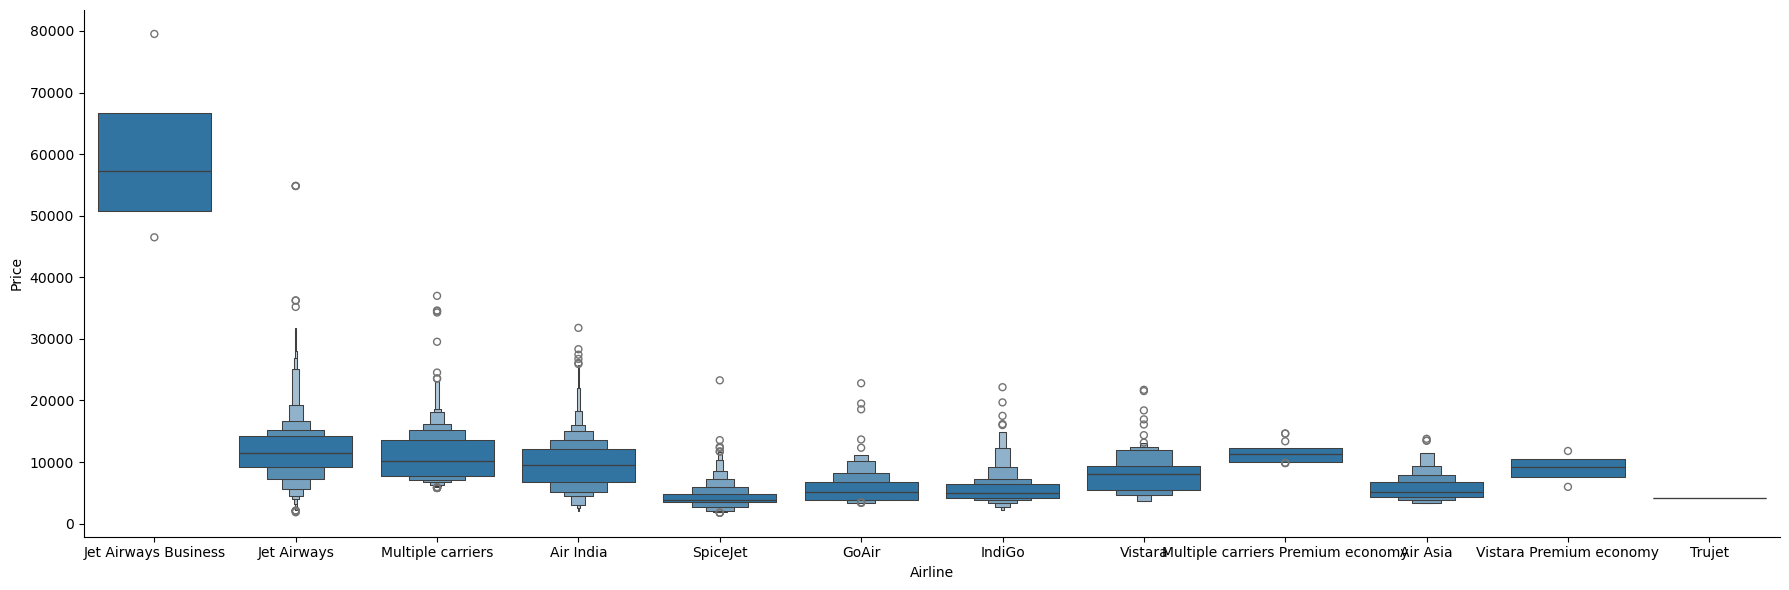

In [44]:
sns.catplot(y = "Price", x = "Airline", data = df_f1.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [45]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df_f1[["Departure Station"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
Destination = df_f1[["Arrival Station"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head(10)

,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,1,0,0,0,0


In [47]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df_f1.drop(['Stop1','Stop2','Stop3', "Extra Info"], axis = 1, inplace = True)

In [48]:
df_f1

,Airline,Departure Station,Arrival Station,Departure Time,Price,Day,Month_Name,Stop_Count,Arrival Time (Extracted),Total Distance,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,22:20,3897,24,March,0,01:10,1709.71,2,50
1,Air India,Kolkata,Banglore,05:50,7662,1,May,2,13:15,1838.55,7,25
2,Jet Airways,Delhi,Cochin,09:25,13882,9,June,2,04:25,2671.33,19,0
3,IndiGo,Kolkata,Banglore,18:05,6218,12,May,1,23:30,1874.71,5,25
4,IndiGo,Banglore,New Delhi,16:50,13302,1,March,1,21:35,853.49,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,Delhi,Cochin,05:05,6827,27,March,1,10:05,367.38,5,0
8996,Air India,Mumbai,Hyderabad,06:20,3100,12,May,0,07:40,623.54,1,20
8997,Jet Airways,Mumbai,Hyderabad,19:35,2759,15,March,0,21:05,623.54,1,30
8998,Air India,Delhi,Cochin,10:55,11753,9,May,2,19:15,2993.19,8,20


In [49]:
data = pd.concat([df_f1, Airline, Source, Destination], axis = 1)

In [50]:
data

,Airline,Departure Station,Arrival Station,Departure Time,Price,Day,Month_Name,Stop_Count,Arrival Time (Extracted),Total Distance,...,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,IndiGo,Banglore,New Delhi,22:20,3897,24,March,0,01:10,1709.71,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,05:50,7662,1,May,2,13:15,1838.55,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,09:25,13882,9,June,2,04:25,2671.33,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,18:05,6218,12,May,1,23:30,1874.71,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,16:50,13302,1,March,1,21:35,853.49,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,Delhi,Cochin,05:05,6827,27,March,1,10:05,367.38,...,0,0,1,0,0,1,0,0,0,0
8996,Air India,Mumbai,Hyderabad,06:20,3100,12,May,0,07:40,623.54,...,0,0,0,0,1,0,0,1,0,0
8997,Jet Airways,Mumbai,Hyderabad,19:35,2759,15,March,0,21:05,623.54,...,0,0,0,0,1,0,0,1,0,0
8998,Air India,Delhi,Cochin,10:55,11753,9,May,2,19:15,2993.19,...,0,0,1,0,0,1,0,0,0,0


In [51]:
data.shape

(9000, 32)

In [52]:
data.drop(["Airline", "Departure Station", "Arrival Station"], axis = 1, inplace = True)

In [53]:
data

,Departure Time,Price,Day,Month_Name,Stop_Count,Arrival Time (Extracted),Total Distance,duration_hours,duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Departure Station_Chennai,Departure Station_Delhi,Departure Station_Kolkata,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi
0,22:20,3897,24,March,0,01:10,1709.71,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,05:50,7662,1,May,2,13:15,1838.55,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,09:25,13882,9,June,2,04:25,2671.33,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,18:05,6218,12,May,1,23:30,1874.71,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,16:50,13302,1,March,1,21:35,853.49,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,05:05,6827,27,March,1,10:05,367.38,5,0,0,...,0,0,1,0,0,1,0,0,0,0
8996,06:20,3100,12,May,0,07:40,623.54,1,20,1,...,0,0,0,0,1,0,0,1,0,0
8997,19:35,2759,15,March,0,21:05,623.54,1,30,0,...,0,0,0,0,1,0,0,1,0,0
8998,10:55,11753,9,May,2,19:15,2993.19,8,20,1,...,0,0,1,0,0,1,0,0,0,0


In [54]:
data["Dep_hour"] = pd.to_datetime(data["Departure Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Departure Time"]).dt.minute
data.drop(["Departure Time"], axis = 1, inplace = True)

In [55]:
data["Arrival_hour"] = pd.to_datetime(data['Arrival Time (Extracted)']).dt.hour
data["Arrival_min"] = pd.to_datetime(data['Arrival Time (Extracted)']).dt.minute
data.drop(["Arrival Time (Extracted)"], axis = 1, inplace = True)

In [56]:
data

,Price,Day,Month_Name,Stop_Count,Total Distance,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Departure Station_Mumbai,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3897,24,March,0,1709.71,2,50,0,0,1,...,0,0,0,0,0,1,22,20,1,10
1,7662,1,May,2,1838.55,7,25,1,0,0,...,0,0,0,0,0,0,5,50,13,15
2,13882,9,June,2,2671.33,19,0,0,0,0,...,0,1,0,0,0,0,9,25,4,25
3,6218,12,May,1,1874.71,5,25,0,0,1,...,0,0,0,0,0,0,18,5,23,30
4,13302,1,March,1,853.49,4,45,0,0,1,...,0,0,0,0,0,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,6827,27,March,1,367.38,5,0,0,0,1,...,0,1,0,0,0,0,5,5,10,5
8996,3100,12,May,0,623.54,1,20,1,0,0,...,1,0,0,1,0,0,6,20,7,40
8997,2759,15,March,0,623.54,1,30,0,0,0,...,1,0,0,1,0,0,19,35,21,5
8998,11753,9,May,2,2993.19,8,20,1,0,0,...,0,1,0,0,0,0,10,55,19,15


In [57]:
le = LabelEncoder()
data_encoded = data.copy()
data_encoded['Month_Name_Encoded'] = le.fit_transform(data['Month_Name'])
data_encoded.head()


<IPython.core.display.Javascript object>

,Price,Day,Month_Name,Stop_Count,Total Distance,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Month_Name_Encoded
0,3897,24,March,0,1709.71,2,50,0,0,1,...,0,0,0,0,1,22,20,1,10,2
1,7662,1,May,2,1838.55,7,25,1,0,0,...,0,0,0,0,0,5,50,13,15,3
2,13882,9,June,2,2671.33,19,0,0,0,0,...,1,0,0,0,0,9,25,4,25,1
3,6218,12,May,1,1874.71,5,25,0,0,1,...,0,0,0,0,0,18,5,23,30,3
4,13302,1,March,1,853.49,4,45,0,0,1,...,0,0,0,0,1,16,50,21,35,2


In [58]:
data_encoded.drop(['Month_Name'], axis=1, inplace=True)

In [59]:
data_encoded.head()

,Price,Day,Stop_Count,Total Distance,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Month_Name_Encoded
0,3897,24,0,1709.71,2,50,0,0,1,0,...,0,0,0,0,1,22,20,1,10,2
1,7662,1,2,1838.55,7,25,1,0,0,0,...,0,0,0,0,0,5,50,13,15,3
2,13882,9,2,2671.33,19,0,0,0,0,1,...,1,0,0,0,0,9,25,4,25,1
3,6218,12,1,1874.71,5,25,0,0,1,0,...,0,0,0,0,0,18,5,23,30,3
4,13302,1,1,853.49,4,45,0,0,1,0,...,0,0,0,0,1,16,50,21,35,2


In [60]:
data1=data_encoded.iloc[:,:7]
data1

,Price,Day,Stop_Count,Total Distance,duration_hours,duration_mins,Airline_Air India
0,3897,24,0,1709.71,2,50,0
1,7662,1,2,1838.55,7,25,1
2,13882,9,2,2671.33,19,0,0
3,6218,12,1,1874.71,5,25,0
4,13302,1,1,853.49,4,45,0
...,...,...,...,...,...,...,...
8995,6827,27,1,367.38,5,0,0
8996,3100,12,0,623.54,1,20,1
8997,2759,15,0,623.54,1,30,0
8998,11753,9,2,2993.19,8,20,1


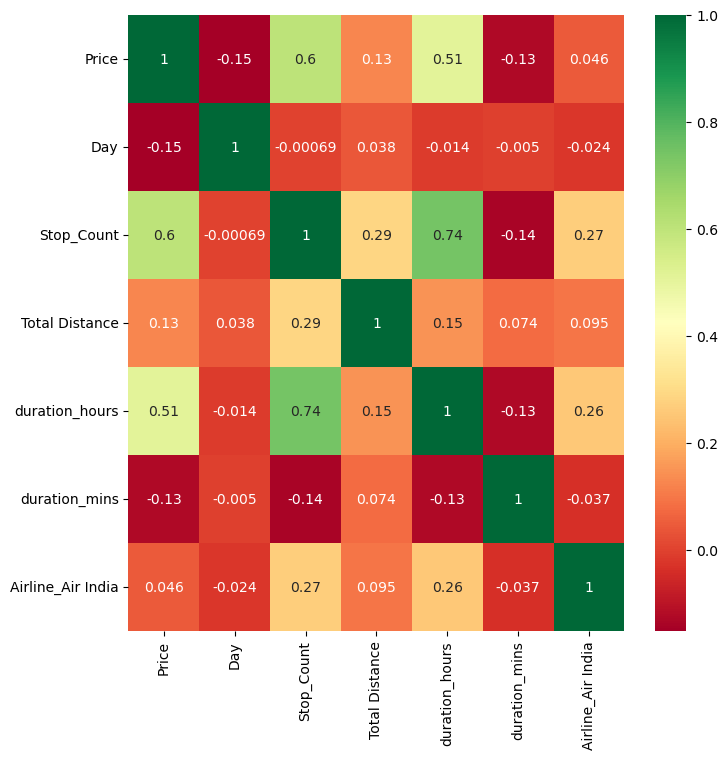

In [61]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (8,8))
sns.heatmap(data1.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [62]:
y = data_encoded['Price']
X = data_encoded.drop(['Price'], axis=1)
y

0        3897
1        7662
2       13882
3        6218
4       13302
        ...  
8995     6827
8996     3100
8997     2759
8998    11753
8999    12648
Name: Price, Length: 9000, dtype: int64

In [63]:
X

,Day,Stop_Count,Total Distance,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Arrival Station_Cochin,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Month_Name_Encoded
0,24,0,1709.71,2,50,0,0,1,0,0,...,0,0,0,0,1,22,20,1,10,2
1,1,2,1838.55,7,25,1,0,0,0,0,...,0,0,0,0,0,5,50,13,15,3
2,9,2,2671.33,19,0,0,0,0,1,0,...,1,0,0,0,0,9,25,4,25,1
3,12,1,1874.71,5,25,0,0,1,0,0,...,0,0,0,0,0,18,5,23,30,3
4,1,1,853.49,4,45,0,0,1,0,0,...,0,0,0,0,1,16,50,21,35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,27,1,367.38,5,0,0,0,1,0,0,...,1,0,0,0,0,5,5,10,5,2
8996,12,0,623.54,1,20,1,0,0,0,0,...,0,0,1,0,0,6,20,7,40,3
8997,15,0,623.54,1,30,0,0,0,1,0,...,0,0,1,0,0,19,35,21,5,2
8998,9,2,2993.19,8,20,1,0,0,0,0,...,1,0,0,0,0,10,55,19,15,3


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train.shape

(7200, 30)

In [65]:
train_data = pd.concat([X_train, y_train], axis=1)

In [66]:
train_data 

,Day,Stop_Count,Total Distance,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Arrival Station_Delhi,Arrival Station_Hyderabad,Arrival Station_Kolkata,Arrival Station_New Delhi,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Month_Name_Encoded,Price
4058,9,1,1665.73,14,35,0,0,0,1,0,...,0,0,0,0,14,5,4,40,3,13941
7882,27,0,1547.27,2,20,0,0,0,0,0,...,0,0,0,0,22,20,0,40,1,3873
8728,18,0,1387.26,2,20,0,0,0,0,0,...,0,0,1,0,17,45,20,5,3,3543
49,27,2,2263.95,19,55,0,0,0,1,0,...,0,0,0,0,23,5,19,0,1,11150
8184,12,1,1971.87,15,20,0,0,0,1,0,...,0,0,0,1,16,55,8,15,2,13817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,27,0,1709.71,2,45,0,0,0,1,0,...,1,0,0,0,6,0,8,45,0,4544
79,21,0,1387.26,2,15,0,0,0,0,0,...,0,0,1,0,8,20,10,35,2,3332
8039,24,1,1064.36,6,55,0,0,1,0,0,...,0,0,0,0,18,35,1,30,1,5883
6936,24,0,1709.71,2,50,0,0,1,0,0,...,0,0,0,1,4,0,6,50,2,5694


In [67]:
y = train_data['Price']
X = train_data.drop(['Price'], axis=1)


In [68]:
import sklearn

In [69]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [70]:
print(selection.feature_importances_)


[1.26536796e-01 2.82035077e-01 2.20151649e-02 9.44937347e-02
 1.73456877e-02 8.07556463e-03 1.47519458e-03 1.32606560e-02
 1.25487821e-01 7.03358495e-02 2.17095058e-02 9.60622571e-04
 2.80339111e-03 1.96480471e-04 4.42286112e-03 1.20968168e-04
 3.75232694e-04 4.89873475e-03 3.89019721e-03 4.93649626e-03
 4.07047108e-03 1.32439070e-02 7.43502726e-03 4.20979525e-04
 2.43190989e-02 2.31506991e-02 1.62065699e-02 2.83331484e-02
 1.89559282e-02 5.84881348e-02]


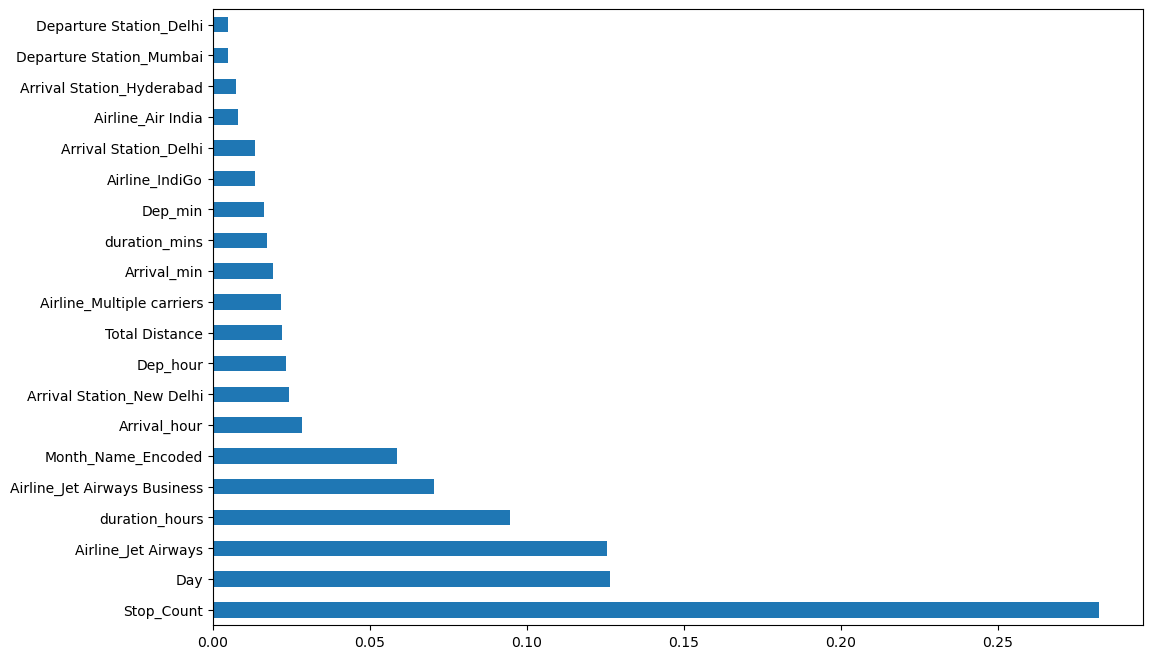

In [71]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# fitting model using random forest

1. * > Split dataset into train and test set in order to prediction w.r.t X_test
2. * > If needed do scaling of data
3. * > Scaling is not done in Random forest
4. * > Import model
5. * > Fit the data
6. * > Predict w.r.t X_test
7. * > In regression check RSME Score
8. * > Plot graph

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
y_pred = reg_rf.predict(X_test)


In [75]:
reg_rf.score(X_train, y_train)


0.9581171990808192

In [76]:
reg_rf.score(X_test, y_test)


0.6786833816117213

C:\Users\balur\AppData\Local\Temp\ipykernel_22352\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


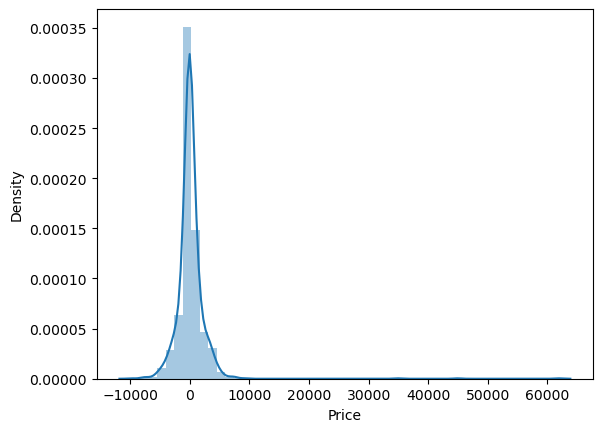

In [77]:
sns.distplot(y_test-y_pred)
plt.show()

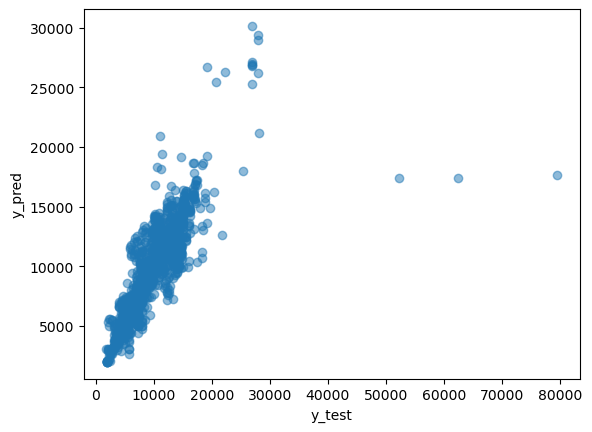

In [78]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [79]:
from sklearn import metrics


In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1254.0952353863536
MSE: 8129445.890886177
RMSE: 2851.2183169456134


In [81]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [82]:
metrics.r2_score(y_test, y_pred)

0.6786833816117213

# hyperparameter tuning

* > Choose following method for hyperparameter tuning
* > RandomizedSearchCV --> Fast
* > GridSearchCV
* > Assign hyperparameters in form of dictionery
* > Fit the model
* > Check best paramters and best score

In [83]:
from sklearn.model_selection import RandomizedSearchCV


In [84]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [85]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [86]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [87]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.7s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.3s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.9s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.8s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.0s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.9s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.7s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.7s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.7s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.7s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.3s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.3s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.3s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.2s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  16.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  16.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.0s
[CV] END max_depth=5, max_feat

C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  18.5s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  18.5s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  18.9s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  18.2s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  18.6s


C:\Users\balur\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [89]:
prediction = rf_random.predict(X_test)


C:\Users\balur\AppData\Local\Temp\ipykernel_22352\1574001921.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


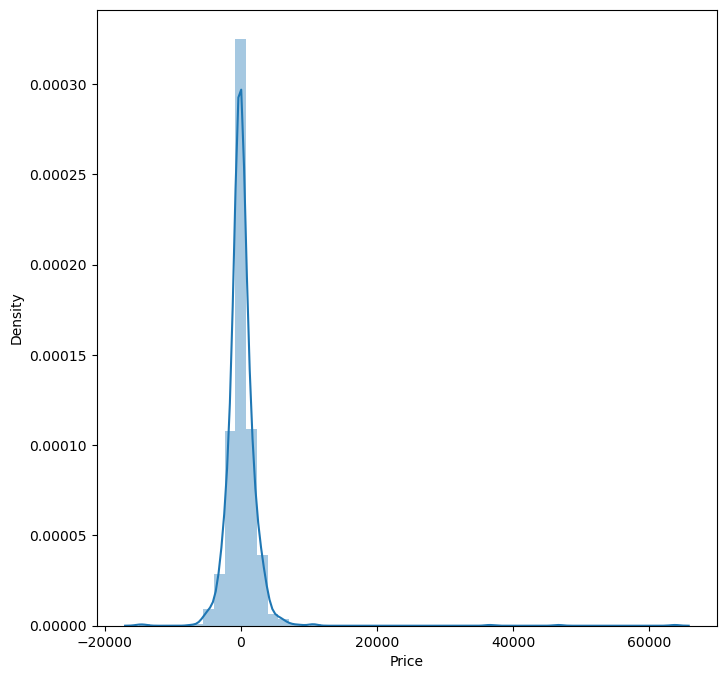

In [90]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()


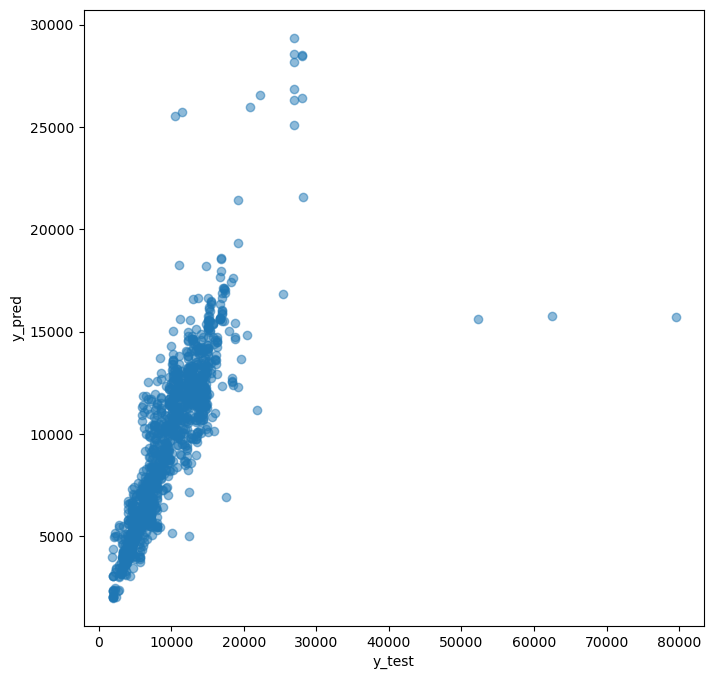

In [91]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))